# **Task 1 - Data Analysis & Understanding**

## **Import Python Libraries Connect to DB**

In [1]:
#pip install pandas
import sqlite3
import pandas as pd

# DB File Path
db_path = "/Users/deepthi.matta/dbt_test_projects/customer_invoices.db"
# Connect to customer_invoices database
conn = sqlite3.connect(db_path)

### **-------------------------------------------------------------------------------------------------------------**

## **Query the tables**

### **Abrechnung_Kunden**

In [2]:
query = "SELECT * FROM Abrechnung_Kunden;"
dataframe = pd.read_sql_query(query, conn)
# Display the output
dataframe

,id,Kdnr,Verlagsname,Region
0,5,20172,1. FC Nürnberg,Nürnberg
1,19,20137,Allgäuer Zeitung / Allgäuer Zeitungsverlag GmbH,Bodensee
2,27,20115,Augsburger Allgemeine,München
3,69,10113,Brainpool TV Productions,Rheinland
4,72,10154,RFW / Redaktionsbüro Wipperfürth,Hamburg
...,...,...,...,...
596,14014,81391,PPF,NULL
597,14021,81398,VLAAMSE RADIO- EN TELEVISIEOMROEP (VRT),NULL
598,14025,81402,Umweltinstitut München,NULL
599,14031,81408,Everprod - Groupe Elephant,NULL


### **-------------------------------------------------------------------------------------------------------------**

### **Abrechnung_Rechnungen**

In [3]:
query = "SELECT * FROM Abrechnung_Rechnungen;"
dataframe = pd.read_sql_query(query, conn)
# Display the output
dataframe

,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum
0,101602,145.0,0,145,81044,0,2024-11-04 00:00:00.000,2024-11-08 00:00:00.000
1,101603,375.0,7,401.25,20843,0,2024-11-04 00:00:00.000,2024-11-28 00:00:00.000
2,101604,94.5,7,101.12,20843,0,2024-11-04 00:00:00.000,2024-11-18 00:00:00.000
3,101605,3450.0,7,3691.5,20020,0,2024-11-04 00:00:00.000,2024-11-12 00:00:00.000
4,101606,37550.0,0,37842.17,78962,-292.17,2024-11-04 00:00:00.000,2024-11-07 00:00:00.000
...,...,...,...,...,...,...,...,...
1995,103597,1260.0,7,0,20213,0,2025-04-03 00:00:00.000,NULL
1996,103598,225.0,7,0,10383,0,2025-04-01 00:00:00.000,NULL
1997,103599,160.0,7,0,30145,0,2025-04-04 00:00:00.000,NULL
1998,103600,379.0,7,0,79666,0,2025-04-03 00:00:00.000,NULL


### **-------------------------------------------------------------------------------------------------------------**

### **Abrechnung_Positionen**

In [4]:
query = "SELECT * FROM Abrechnung_Positionen;"
dataframe = pd.read_sql_query(query, conn)
# Display the output
dataframe

,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
0,4069567,103172,30035,45.0,92104298,2021-03-15 00:00:00.000
1,4069568,103172,30035,15.0,76396227,2021-03-15 00:00:00.000
2,4069569,103172,30035,140.0,88872289,2021-04-15 00:00:00.000
3,4069570,103172,30035,30.0,78670291,2021-05-15 00:00:00.000
4,4069571,103172,30035,45.0,51407649,2021-05-15 00:00:00.000
...,...,...,...,...,...,...
129087,5726954,103389,20115,20.0,1058373276,2025-02-05 00:00:00.000
129088,5726955,103389,20115,20.0,105481711,2025-02-07 00:00:00.000
129089,5726956,103389,20115,20.0,100000000,2025-02-08 00:00:00.000
129090,5726957,103389,20115,20.0,1058638486,2025-02-10 00:00:00.000


### **-------------------------------------------------------------------------------------------------------------**

### **Source Files Data Checks**

In [5]:
# Run SQL query -  Check for NULL value in the fields.
query_null_checks = '''select count(1) as null_count, 'id' as col_nm , 'Abrechnung_Kunden' AS table_name 
from Abrechnung_Kunden where id ='NULL'
        union 
        select count(1) , 'Kdnr' as col_nm , 'Abrechnung_Kunden' AS table_name 
        from Abrechnung_Kunden where Kdnr ='NULL'
        union 
        select count(1) , 'Verlagsname' as col_nm , 'Abrechnung_Kunden' AS table_name 
        from Abrechnung_Kunden where Verlagsname ='NULL'
        union 
        select count(1) , 'Region' as col_nm , 'Abrechnung_Kunden' AS table_name 
        from Abrechnung_Kunden where Region ='NULL'
        union 
        select count(1) , 'id' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where id ='NULL'
        union 
        select count(1) , 'Reid' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Reid ='NULL'
        union 
        select count(1) , 'KdNr' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where KdNr ='NULL'
        union 
        select count(1) , 'Nettobetrag' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Nettobetrag ='NULL'
        union 
        select count(1) , 'Bildnummer' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Bildnummer ='NULL'
        union 
        select count(1) , 'VerDatum' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where VerDatum ='NULL'

        union 
        select count(1) , 'ReNummer' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where ReNummer ='NULL'
        union 
        select count(1) , 'SummeNetto' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where SummeNetto ='NULL'
        union 
        select count(1) , 'MwStSatz' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where MwStSatz ='NULL'
        union 
        select count(1) , 'ZahlungsbetragBrutto' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where ZahlungsbetragBrutto ='NULL'
        union 
        select count(1) , 'KdNr' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where KdNr ='NULL'
        union 
        select count(1) , 'Summenebenkosten' as col_nm, 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where Summenebenkosten ='NULL'
        union 
        select count(1) , 'ReDatum' as col_nm, 'Abrechnung_Rechnungen' AS table_name
        from Abrechnung_Rechnungen where ReDatum ='NULL'
        union 
        select count(1) , 'Zahlungsdatum' as col_nm, 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where Zahlungsdatum ='NULL'
        order by table_name, col_nm
       
        ;
       '''

dataframe_null_checks = pd.read_sql_query(query_null_checks, conn)

# Display the output
dataframe_null_checks


,null_count,col_nm,table_name
0,0,Kdnr,Abrechnung_Kunden
1,321,Region,Abrechnung_Kunden
2,0,Verlagsname,Abrechnung_Kunden
3,0,id,Abrechnung_Kunden
4,1,Bildnummer,Abrechnung_Positionen
5,1,KdNr,Abrechnung_Positionen
6,1,Nettobetrag,Abrechnung_Positionen
7,0,Reid,Abrechnung_Positionen
8,4,VerDatum,Abrechnung_Positionen
9,0,id,Abrechnung_Positionen


### **Q1.How many positions are linked to invoices that are missing payment info** 

### **Using Join** 

In [6]:
# Run SQL query -  query_positions_missing_payment_info
query_positions_missing_payment_info = '''
       SELECT COUNT(id) AS positions_missing_payment_info
       FROM Abrechnung_Positionen p 
       LEFT JOIN Abrechnung_Rechnungen r 
       ON p.ReId = r.ReNummer
       WHERE r.Zahlungsdatum IS NULL OR r.Zahlungsdatum = 'NULL'
        ;
       '''
dataframe_positions_missing_payment_info = pd.read_sql_query(query_positions_missing_payment_info, conn)
dataframe_positions_missing_payment_info


,positions_missing_payment_info
0,18011


### **Using Exists** 

In [7]:
# Run SQL query -  query_positions_missing_payment_info
query_positions_missing_payment_info = '''
       SELECT COUNT(p.id) AS positions_missing_payment_info
       FROM Abrechnung_Positionen p WHERE EXISTS 
       ( SELECT 1 FROM Abrechnung_Rechnungen r 
       WHERE p.ReId = r.ReNummer
       AND (r.Zahlungsdatum IS NULL OR r.Zahlungsdatum = 'NULL'));'''
dataframe_positions_missing_payment_info = pd.read_sql_query(query_positions_missing_payment_info, conn)
# Display the output
dataframe_positions_missing_payment_info

,positions_missing_payment_info
0,18011


### **Q2.How much revenue is attributed to placeholder media ID '100000000'** 

In [8]:
# Run SQL query -  query_revenue_placeholder_media
query_revenue_placeholder_media = '''
       SELECT Bildnummer , SUM(Nettobetrag) AS placeholder_media_revenue
       FROM Abrechnung_Positionen
       WHERE Bildnummer = 100000000 
       GROUP BY 1;'''

dataframe_revenue_placeholder_media = pd.read_sql_query(query_revenue_placeholder_media, conn)

# Display the output
dataframe_revenue_placeholder_media

,Bildnummer,placeholder_media_revenue
0,100000000,1319897.91


### **Q3.How many invoices have no positions attached**

### **Using Join**

In [9]:
query_invoices_without_any_positions = '''
       SELECT COUNT(1) AS invoices_without_any_positions
        FROM Abrechnung_Rechnungen r
        LEFT JOIN Abrechnung_Positionen p ON r.ReNummer = p.ReId
        WHERE p.ReId IS NULL
        ;
       '''

dataframe_invoices_without_any_positions = pd.read_sql_query(query_invoices_without_any_positions, conn)
dataframe_invoices_without_any_positions

,invoices_without_any_positions
0,2


### **Using Exists**

In [10]:
# Run SQL query -  query_invoices_without_any_positions
query_invoices_without_any_positions = '''
       SELECT COUNT(1) AS invoices_without_any_positions
        FROM Abrechnung_Rechnungen r WHERE NOT EXISTS (
        SELECT 1 FROM Abrechnung_Positionen p 
        WHERE r.ReNummer = p.ReId
        );'''
dataframe_invoices_without_any_positions = pd.read_sql_query(query_invoices_without_any_positions, conn)
dataframe_invoices_without_any_positions

,invoices_without_any_positions
0,2


## **===============================================================================================================================================================**

# **Task 2 - Pipeline Proposal**

## **===============================================================================================================================================================**

## **Queries - using existing dataset**

## **-------------------------------------------------------------------------------------------------------------------------------**

### **Q1. Capture missing or delayed payments**

In [11]:
query_payment_delay_checks = '''
       with t as (SELECT *,
       CASE WHEN Zahlungsdatum !='NULL' 
       THEN julianday(Zahlungsdatum) - julianday(ReDatum) 
       end AS days_between_invoice_payment,
       CASE WHEN Zahlungsdatum ='NULL' 
       THEN 'Not_paid' 
       WHEN Zahlungsdatum !='NULL' AND julianday(Zahlungsdatum) - julianday(ReDatum) > 7 
       THEN 'Delayed_Payment' 
       ELSE 'Paid' END AS payment_status
       FROM Abrechnung_Rechnungen 
       where (kdnr != 'NULL' and kdnr>0) and (Renummer != 'NULL' and renummer > 0) )
       select * from t where payment_status not in ('Paid');'''

dataframe_payment_delay_checks = pd.read_sql_query(query_payment_delay_checks, conn)

# Display the output
dataframe_payment_delay_checks

,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum,days_between_invoice_payment,payment_status
0,101603,375.0,7,401.25,20843,0,2024-11-04 00:00:00.000,2024-11-28 00:00:00.000,24.0,Delayed_Payment
1,101604,94.5,7,101.12,20843,0,2024-11-04 00:00:00.000,2024-11-18 00:00:00.000,14.0,Delayed_Payment
2,101605,3450.0,7,3691.5,20020,0,2024-11-04 00:00:00.000,2024-11-12 00:00:00.000,8.0,Delayed_Payment
3,101607,45.0,7,48.15,75685,0,2024-11-04 00:00:00.000,2024-11-12 00:00:00.000,8.0,Delayed_Payment
4,101608,500.0,7,535,80531,0,2024-11-04 00:00:00.000,2025-01-16 00:00:00.000,73.0,Delayed_Payment
...,...,...,...,...,...,...,...,...,...,...
1368,103597,1260.0,7,0,20213,0,2025-04-03 00:00:00.000,NULL,NaN,Not_paid
1369,103598,225.0,7,0,10383,0,2025-04-01 00:00:00.000,NULL,NaN,Not_paid
1370,103599,160.0,7,0,30145,0,2025-04-04 00:00:00.000,NULL,NaN,Not_paid
1371,103600,379.0,7,0,79666,0,2025-04-03 00:00:00.000,NULL,NaN,Not_paid


## **----------------------------------------------------------------------------------------------------------------------------------**

### **Q2. Flag or isolate “placeholder” media positions**

In [12]:
query_placeholder_position_flag = '''
       with t as (SELECT *, 
       CASE WHEN Bildnummer = 100000000 THEN 1 ELSE 0 END AS is_placeholder
       FROM Abrechnung_Positionen
       WHERE (kdnr != 'NULL' and kdnr>0) and (Reid != 'NULL' and reid > 0))
       select * from t where is_placeholder = 1'''

dataframe_placeholder_position_flag = pd.read_sql_query(query_placeholder_position_flag, conn)

# Display the output
dataframe_placeholder_position_flag

,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum,is_placeholder
0,4142217,101703,79345,425.00,100000000,2022-06-01 00:00:00.000,1
1,4142761,101721,72880,49.00,100000000,2022-08-01 00:00:00.000,1
2,4142762,101721,72880,49.00,100000000,2022-08-01 00:00:00.000,1
3,4142763,101721,72880,49.00,100000000,2022-08-01 00:00:00.000,1
4,4142764,101721,72880,49.00,100000000,2022-08-01 00:00:00.000,1
...,...,...,...,...,...,...,...
2402,5726950,103209,10813,12.00,100000000,2025-02-25 00:00:00.000,1
2403,5726951,103209,10813,12.00,100000000,2025-02-25 00:00:00.000,1
2404,5726952,103209,10813,12.00,100000000,2025-02-23 00:00:00.000,1
2405,5726953,103209,10813,0.24,100000000,2025-02-15 00:00:00.000,1


## **----------------------------------------------------------------------------------------------------------------------------------**

### **Q3. Improve data quality validation upstream - Query to capture invalid data fields**
## **----------------------------------------------------------------------------------------------------------------------------------**

In [13]:
# Run SQL query -  Check for NULL value in the fields.
query_invalid_data_checks = '''with t as (select count(1) as cnt, 'id' as col_nm , 'Abrechnung_Kunden' AS table_name 
from Abrechnung_Kunden where id ='NULL'
        union 
        select count(1) , 'Kdnr' as col_nm , 'Abrechnung_Kunden' AS table_name 
        from Abrechnung_Kunden where Kdnr ='NULL' or Kdnr < 0 
        union 
        select count(1) , 'id' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where id ='NULL'
        union 
        select count(1) , 'Reid' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Reid ='NULL' or Reid < 0 
        union 
        select count(1) , 'KdNr' as col_nm , 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where KdNr ='NULL' or KdNr < 0
        union 
        select count(1) , 'Nettobetrag' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Nettobetrag ='NULL' or (Nettobetrag <= 0 and Bildnummer != 100000000)
        union 
        select count(1) , 'Bildnummer' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where Bildnummer ='NULL' 
        union 
        select count(1) , 'VerDatum' as col_nm, 'Abrechnung_Positionen' AS table_name 
        from Abrechnung_Positionen where VerDatum ='NULL'

        union 
        select count(1) , 'ReNummer' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where ReNummer ='NULL' and ReNummer < 0
        union 
        select count(1) , 'SummeNetto' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where SummeNetto ='NULL' and SummeNetto <= 0
        union 
        select count(1) , 'ZahlungsbetragBrutto' as col_nm , 'Abrechnung_Rechnungen' AS table_name
        from Abrechnung_Rechnungen where ZahlungsbetragBrutto ='NULL' and ZahlungsbetragBrutto <= 0
        union 
        select count(1) , 'KdNr' as col_nm , 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where KdNr ='NULL'  or KdNr < 0
        union 
        select count(1) , 'ReDatum' as col_nm, 'Abrechnung_Rechnungen' AS table_name 
        from Abrechnung_Rechnungen where ReDatum ='NULL'
        order by table_name, col_nm)
        select * from t where cnt > 0
        ;
       '''

dataframe_invalid_data_checks = pd.read_sql_query(query_invalid_data_checks, conn)

# Display the output
dataframe_invalid_data_checks


,cnt,col_nm,table_name
0,1,Bildnummer,Abrechnung_Positionen
1,1,KdNr,Abrechnung_Positionen
2,24,Nettobetrag,Abrechnung_Positionen
3,4,VerDatum,Abrechnung_Positionen


### **==============================================================================================================================================================**

## **Revised data model using DBT**

### **==============================================================================================================================================================**

## **dbt-model - Folder structure for customer_invoices**


### **----------------------------------------------------------------------------------------------------------------------------------------------**

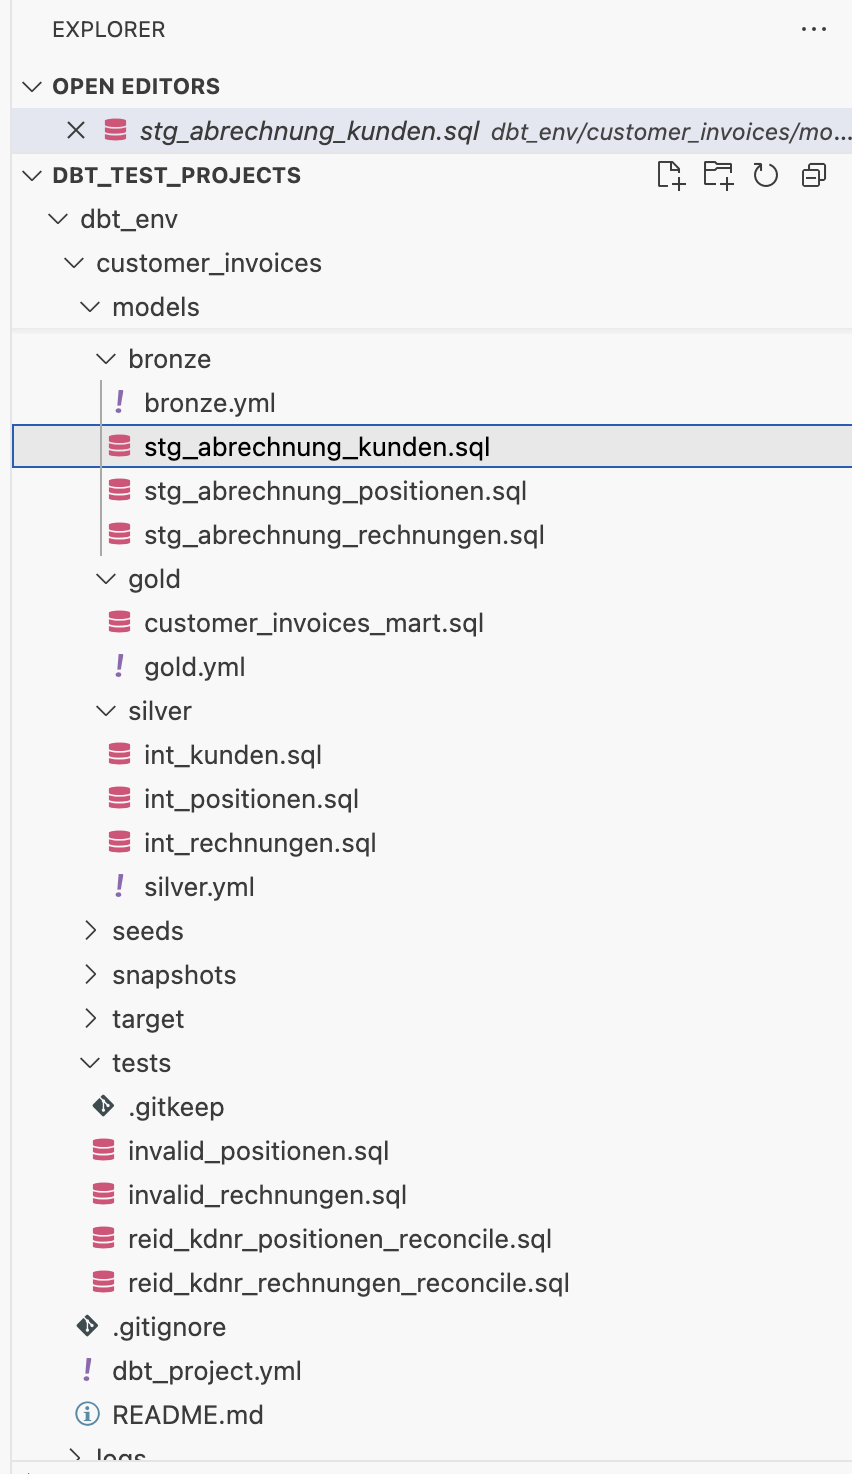

### **Note: Please download the dbt_env folder and open it either VS code for the DBT code**

### **----------------------------------------------------------------------------------------------------------------------------------------------**

## **Assumptions**

### 1.KdNr is NULL/'NULL' or KdNr < 0 - Invalid KdNr
### 2.ReId is NULL/'NULL' or ReId < 0 - Invalid ReID
### 3.If the difference between Zahlungsdatum and ReDatum >7 days, consider them as 'Delayed Payments'
### 4.Considering Bildnummer = 100000000 as placeholder data

### **----------------------------------------------------------------------------------------------------------------------------------------------**

## **Revised data model - Downstream Impact on Reporting**

## **Benefits of Revised Data Model**
## ***************************************************************************

### **1. Better Data Reconciliation – Ensures Improved Data Quality**  
   ### By clearly separating valid, invalid, and placeholder/test data, the model helps in:  

   ### -> Reconciliating invoice totals with position-level data  
   ### -> Matching payment records with corresponding invoices  
   ### -> Clearly identifying real data gaps or anomalies

### **2. Capturing Invalid Data at the Source**  
   ### Flagging invalid data early in the pipeline enables:  

   ### -> Source teams to review and correct data issues proactively  
   ### -> Filtering out bad records before they impact reporting

### **3. Flagging Placeholder/Test Data and Invalid Entries**  
   ### This helps to:  

   ### -> Avoid data skewness in dashboards and reports  
   ### -> Improve reporting accuracy by excluding placeholder values like Bildnummer = 100000000

### **4. Visibility on Payment Status**  
   ### The introduction of a payment_status field in marts/reports provides:  

   ### -> Highlighting of overdue or missing payments  
   ### -> Clear distinction between actual revenue and expected (unpaid) revenue

## **------------------------------------------------------------------------------------------------------------------------------**

## **What business conversations you'd initiate (e.g., with Backoffice or Finance)**

## **Business Questions for Clarification**
## ***************************************************************************

### **1. Payment Delay Threshold**  
   ### Q.What is the defined threshold (in days) after which a payment should be considered delayed?

### **2. Negative or 0 Nettobetrag / Negative Summenebenkosten**  
   ### Q.Are negative or 0 values in Nettobetrag, and negative values in Summenebenkosten, expected?

   ### -> If yes, what do these values represent?  
   ### -> Do they indicate refunds, adjustments, or something else?

### **3. 1 ReId Tagged to Multiple KdNr**  
   ### Q.Should each ReId be uniquely associated with a single KdNr?  
   ### Is it data issue? If not - in which all cases is this expected?

### **4. ZahlungsbetragBrutto < SummeNetto**  
   ### Q.Noticed some cases where ZahlungsbetragBrutto < SummeNetto  
   ### Is this a data issue? 
   ### If not, in which all scenarios this is expected?

## **------------------------------------------------------------------------------------------------------------------------------**


### **==============================================================================================================================================================**

# **Task 3 - Modern Tooling**

### **==============================================================================================================================================================**

## **Why DBT over SSIS**
## -------------------------------------------------------------------------------------------------------------------------

## **1. Easy Testing and Validations :**
###      DBT supports built-in tests like not_null/unique test and supports - custom data quality checks - singular tests

## **2. DBT ELT vs SSIS ETL :**
###      DBT follows ELT (Extract-Load-Transform) model. It uses warehouse compute power 
###      - execute all transformations directly within the DWH which ensures better scalability and performance.

## **3. Easier to Deploy, Version control and Automate :**
###       DBT integrates easily with Airflow - for orchestration , GitHub - for version controlling

## **4. DBT is Open Source and Cloud Specific :**
###       DBT-Core is open source and designed specifically for cloud data warehouses

## **5. Data Lineage :**
###       DBT generates data lineage for both tables and individual columns, making it easy to trace how data flows through the pipeline. 
###       This helps developers quickly identify the original source of any column used in downstream models or data marts, 
###       which also makes debugging easier.

## **6. Code Reusability :**
###       DBT ref() makes the code reusable especially in layered models (Bronze → Silver → Gold) with clear dependencies.
                                                                     



## ------------------------------------------------------------------------------------------------------------------------

## **NOTE:**
### **I've worked with both dbt Core integrated with Airflow, as well as dbt Cloud.**
### **Here’s a comparison of the advantages of using dbt Core with Airflow versus dbt Cloud**
### **Below are the key advantages and differences between both approaches:**


### **--------------------------------------------------------------------------------------------------------------------------------------------------**

## **Option 1 : DBT-Core for ELT with Airflow for orchestration / scheduling**
## ***************************************************************************

### **1. Flexible and Cost Effective**  
   ### Both DBT Core and Airflow are open-source, which offers full control on the tools without licensing costs. 
   ### They are flexible to deply in cloud.

### **2. DBT ELT Layering**  
   ### dbt Core enables clean, version-controlled SQL transformations  directly on DWH. Layering in DBT helps in

   ### -> Breaks complex logic into small, reusable models

   ### -> Reduces duplication by allowing shared logic across downstream models.

### **3. Easy Scheduling**  
   ### Airflow helps to schedule and chain dbt runs with full control - which include retry , check for dependancy runs etc.

### **4. Easy Git Integration**  
   ### Both Airflow and dbt Core can be easily integrated with Git - for version controlling.
   ### Airflow can also be integrated with Slack or PagerDuty to notify whenever there is failure in pipeline.

## **------------------------------------------------------------------------------------------------------------------------------**

## **Option 2 : DBT-Cloud**
## ***************************************************************************

### **1. Built-in Scheduler**  
   ### No need for external tools like Airflow — schedule dbt runs directly using DBT Cron Jobs.

### **2. User Friendly Web UI**  
   ### Easily develop, run, and monitor dbt models without using the command line.

### **3. Centralized Monitoring**  
   ### All runs, logs, and errors cab be tracket in one place.

### **4. Seamless Git Integration**  
   ### We can push, merge, and deploy into GitHub/GitLab directly through the dbt Cloud interface.

## **-------------------------------------------------------------------------------------------------------------------------------**

## **Proposed Migration from SSIS to DBT**
## ***************************************************************************

### **1. Choose a Cloud DWH Platform and move the raw data into DWH**  
   ### Use a Scripts / Cloud Data Transfer Services / ETL Tools to load source data from SSIS into cloud DWH warehouse.

### **2. Convert SSIS logic into DBT models**  
   ### Design the DBT model structure and rewrite all the transformation logic in SQL into DBT layers.

### **3. Add Respective data Tests**  
   ### Use dbt’s built-in features to check data quality and describe each model and column.

### **4. Schedule and run dbt**  
   ### Use dbt Cloud or Airflow to run dbt models.
   
## **-------------------------------------------------------------------------------------------------------------------------------**

## **Risks in Changing Position Data Processing**
## ***************************************************************************

### **1. Incorrect Financial Calculations**  
  ### Changes in current data logic could lead to incorrect totals.
  ### Instead of directly midifying the existing pipeline, build a new pipeline with the logic changes,
  ### which correct the known existing issues and monitor the % discrepancies with the existing pipeline.

### **2. Broken Reports and Dashboards**  
  ### There are chances that the downstream report data may break if these is any change in upstream source.
  ### To prevent this, introduce the new logic fields into the report, 
  ### explain the end-users regarding the discrepancies old vs new - and eventually get rid of the old-incorrect fields.

### **3. Reconciliation Issues**  
  ### Differences between old (SSIS) and new (dbt) outputs may cause confusion or inconsistencies. 
  ### Always good to maintain both old and new pipelines, until all the issues are addressed,  
  ### communicated to stake-holders and everything is stabilized on the new set-up.

### **4. Stakeholder Trust & Compliance Risk**  
  ### Any discrepancies in financial data may impact stakeholder and sometimes create audit concerns. 
  ### To avoid such cases - 
   ###  -> Do not disturb the old data 
   ###  -> Lift and shift the existing data as it is into DBT 
   ###  -> Implement the logic changes to incoming data - post clear communication with stake-holders.
## **-------------------------------------------------------------------------------------------------------------------------------**

## **Tools Used for Implementation**
## ***************************************************************************

### **1. Database: SQLite**
### **2. Jupyter Notebook**
### **3. DBT Core**
